# Customer Segmentation Using k Means Clustering

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("https://github.com/ArinB/MSBA-CA-Data/raw/main/CA06/Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
df.shape

(200, 5)

In [3]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## Conducting EDA

In [6]:
#Checking for missing values
print(df.isnull().sum())

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [7]:
#Checking for duplicates
df.duplicated()
df.duplicated().sum()

0

### Visualizations

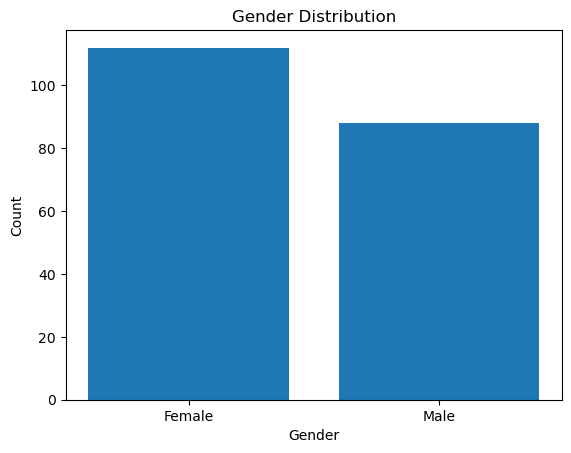

In [9]:
#Creating bar plot for gender
gender_counts = df['Genre'].value_counts()

plt.bar(gender_counts.index, gender_counts.values)

plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [ ]:
create_plot(genre)

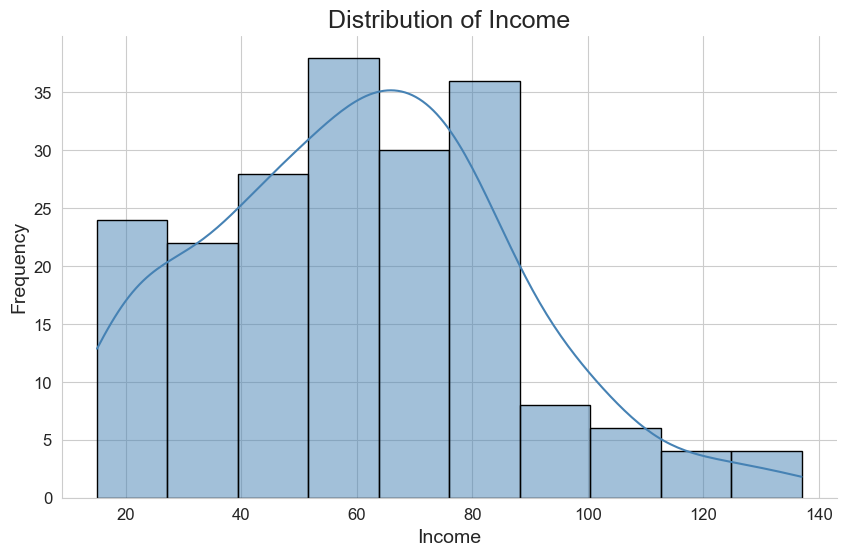

In [18]:
# Histogram for Annual Income
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(data=df, x="Annual Income (k$)", bins=10, kde=True, color="steelblue", edgecolor="black", linewidth=1)

ax.set_title("Distribution of Income", fontsize=18)
ax.set_xlabel("Income", fontsize=14)
ax.set_ylabel("Frequency", fontsize=14)
ax.tick_params(axis="both", which="major", labelsize=12)

sns.despine()

plt.show()

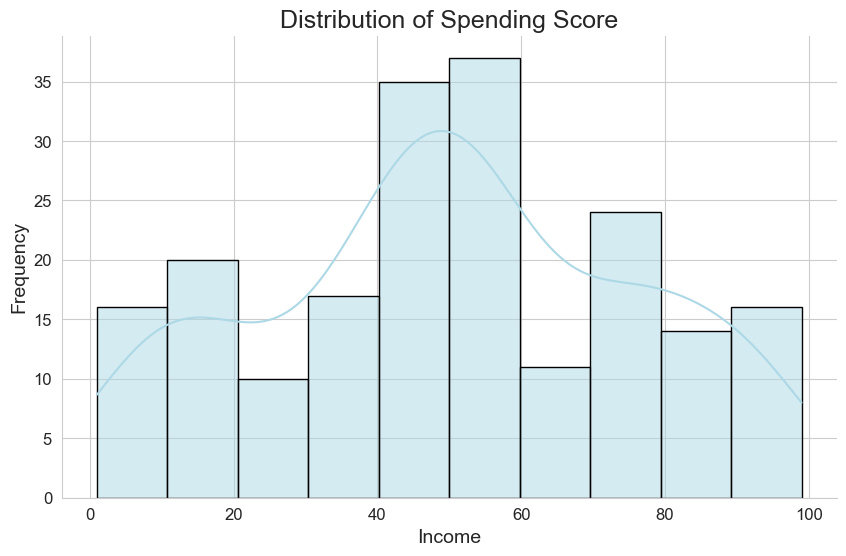

In [20]:
# Histogram for Spending Score
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(data=df, x="Spending Score (1-100)", bins=10, kde=True, color="lightblue", edgecolor="black", linewidth=1)

ax.set_title("Distribution of Spending Score", fontsize=18)
ax.set_xlabel("Income", fontsize=14)
ax.set_ylabel("Frequency", fontsize=14)
ax.tick_params(axis="both", which="major", labelsize=12)

sns.despine()


plt.show()

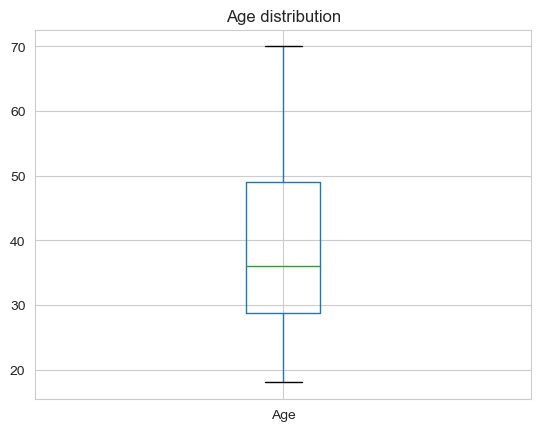

In [21]:
#Boxplot for Age
df.boxplot(column = ["Age"])
plt.title("Age distribution")
plt.show()

## Preparing data for Clustering

In [6]:
from sklearn.preprocessing import MinMaxScaler

# Feature scaling
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df[["Annual Income (k$)", "Spending Score (1-100)"]])

# Create a new DataFrame with selected features
cluster_df = pd.DataFrame(scaled_features, columns=["Annual Income", "Spending Score"])
cluster_df.head()

,Annual Income,Spending Score
0,0.000000,0.387755
1,0.000000,0.816327
2,0.008197,0.051020
3,0.008197,0.775510
4,0.016393,0.397959


## Implement k means Clustering

In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Determine the optimal number of clusters using the Silhouette Method
range_n_clusters = list(range(2, 11))
silhouette_scores = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(cluster_df)
    silhouette_avg = silhouette_score(cluster_df, cluster_labels)
    silhouette_scores.append(silhouette_avg)

optimal_clusters = range_n_clusters[silhouette_scores.index(max(silhouette_scores))]
print("Optimal number of clusters:", optimal_clusters)

# Train the KMeans model
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(cluster_df)

# Obtain cluster assignments for each data point
cluster_assignments = kmeans.predict(cluster_df)

Optimal number of clusters: 5


## Visualizing the Clusters

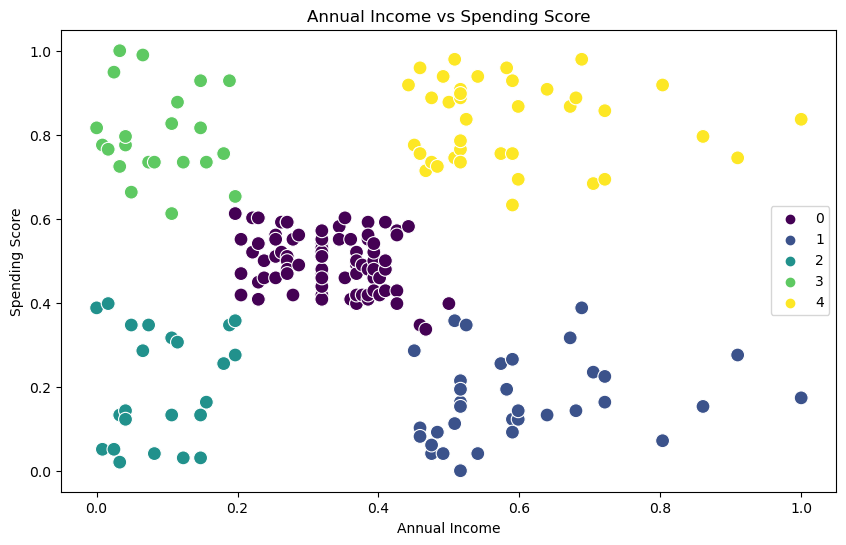

In [8]:
#Scatter plot of the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Annual Income", y="Spending Score", data=cluster_df, hue=cluster_assignments, palette="viridis", s=100)
plt.title("Annual Income vs Spending Score")
plt.show()

## Report